In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pdp
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [2]:
# LOAD DATA
INPUT_DIR  = '../../../input/m5-forecasting-accuracy/'
LOG_NAME = '06_17_18_38_01'
data = pd.read_csv(INPUT_DIR + "sales_train_evaluation.csv")
predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))

In [3]:
predicted.shape

(1, 9, 28)

In [4]:
predicted

array([[[0.38326105, 0.32773328, 0.28220323, 0.34338835, 0.63348913,
         0.82861245, 0.92872477, 0.4998172 , 0.47961247, 0.46235603,
         0.43436173, 0.5765629 , 0.92698205, 0.8611844 , 0.55339265,
         0.4650068 , 0.35638905, 0.4241529 , 0.5362369 , 0.7095432 ,
         0.8000951 , 0.44017464, 0.42196536, 0.3637215 , 0.35878563,
         0.5040351 , 0.7294905 , 0.75094223],
        [0.38538855, 0.3244347 , 0.28579146, 0.34490317, 0.63281775,
         0.82837725, 0.93030983, 0.500688  , 0.47942954, 0.46544978,
         0.43678635, 0.57671   , 0.9281235 , 0.8578713 , 0.5557058 ,
         0.46421742, 0.3626009 , 0.42443568, 0.53551626, 0.7127227 ,
         0.7997885 , 0.43466786, 0.42469794, 0.362304  , 0.3559731 ,
         0.50301635, 0.73307943, 0.74821395],
        [0.38010627, 0.3255056 , 0.2825092 , 0.341863  , 0.63967556,
         0.8259523 , 0.9288347 , 0.49849948, 0.478521  , 0.46652988,
         0.4425233 , 0.5751909 , 0.93078464, 0.8562377 , 0.5488868 ,
         0.

In [5]:
# InverseするためのScalerを作る
data = data.drop('d_1792',axis=1)
use_days = json_load['use_days']
train_x = np.array(data.iloc[:, -1 * (28*2 + use_days) : -28*2]).sum(axis=0).reshape(1,-1)
# train_x = np.array(data.iloc[:, -1 * (28*1 + use_days) : -28*1]).sum(axis=0).reshape(1,-1)
mm = MinMaxScaler(feature_range=(0.05, 0.95))
mm.fit(train_x.T)

MinMaxScaler(copy=True, feature_range=(0.05, 0.95))

In [6]:
# 予測値をInverse Transform
for i in range(9):
    predicted[:,i] = mm.inverse_transform(predicted[:,i])

In [7]:
days = 100
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
sells.reshape(1,-1).shape

(1, 72)

In [8]:
pred_array = np.zeros([1,9,100])

In [9]:
pred_array[0,2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
for i in range(9):
    pred_array[0,i] = np.concatenate([sells.reshape(1,-1),predicted[:,i]],axis=1)
print(pred_array)

[[[53715.         48337.         46152.         37702.
   36545.         36436.         40392.         50857.
   52081.         37328.         33981.         34068.
   34615.         37649.         47887.         50915.
   37259.         36536.         38458.         41459.
   39325.         52322.         57218.         40562.
   37727.         37032.         38267.         40887.
   52711.         51421.         42035.         40117.
   36606.         35009.         39652.         46181.
   47825.         37360.         35475.         34786.
   34003.         45611.         53863.         46360.
   36041.         33857.         32359.         34681.
   45536.         52672.         56425.         40418.
   39683.         39134.         38116.         43220.
   56340.         53856.         42427.         39069.
   35193.         37529.         41789.         48362.
   51640.         38059.         37570.         35343.
   35033.         40517.         48962.         49795.
   36067.9

In [23]:
pred_array[0][0].shape

(100,)

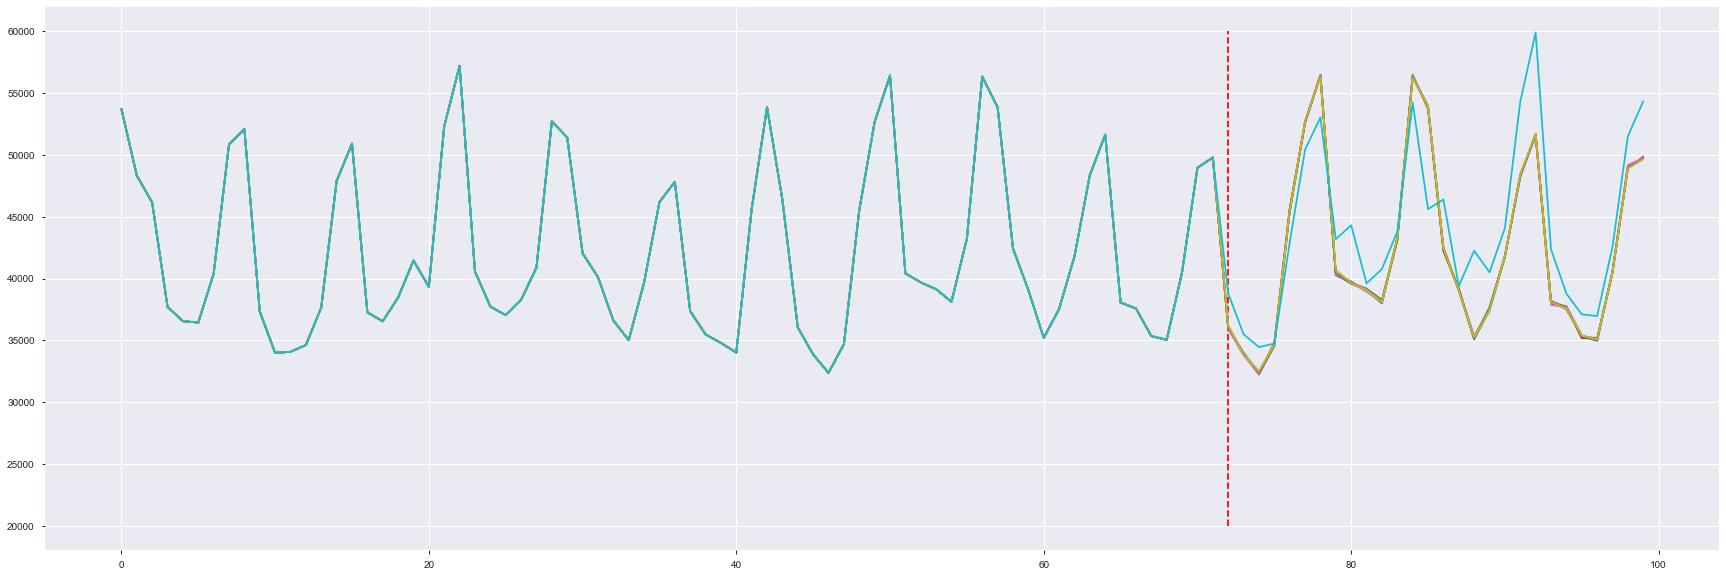

In [11]:
days = 100
f, ax = plt.subplots(figsize=(30, 10))
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
for i in range(9):
    plt.plot(pred_array[0][i])
plt.plot(np.array(data.iloc[:, -1 * days :]).sum(axis=0))
# sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
plt.vlines(days-28, 20000, 60000, "red", linestyles='dashed')